# Covid-19 forecasting 

## Введение. Постановка целей и задач.

COVID-19 - это вызывающий заболевание штамп коронавируса, появившийся в декабре 2019 года и приведший к продолжающейся глобальной пандемии. Возможность предвидеть путь пандемии имеет решающее значение. Это важно для того, чтобы определить, как бороться, и отследить его распространение.

Целью данной работы является анализ данных о заболеваемости за определнный период в выбранной стране и построение прогностической модели, которую можно обучить преобразованию набора входных данных.





Задачи исследования:

1.   Провести анализ данных о заболеваемости;
2.   Предложить и настроить прогностическую модель;
3.   Выполнить прогноз и сравнить результаты с новой статистикой (полученной после 5 апреля 2021 года);


## Импорт библиотек, ознакомление с данными.

### Импорт Датафрейма, библиотек, написание функций.

Импортируем библиотеки:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Считываем исходные датасеты:

In [ ]:
df = pd.read_csv('KSA.csv')

In [ ]:
df1 = pd.read_csv('owid-covid-data.csv')
df1

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137171,ZWE,Africa,Zimbabwe,2021-11-27,133836.0,0.0,31.571,4704.0,0.0,0.714,8867.909,0.000,2.092,311.685,0.000,0.047,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4152.0,1449073.0,96.015,0.275,2788.0,0.185,0.011,88.3,tests performed,6560442.0,3765392.0,2795050.0,NaN,16111.0,23490.0,43.47,24.95,18.52,NaN,1556.0,16225.0,0.108,47.22,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
137172,ZWE,Africa,Zimbabwe,2021-11-28,133951.0,115.0,43.429,4705.0,1.0,0.857,8875.529,7.620,2.878,311.751,0.066,0.057,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1044.0,1450117.0,96.084,0.069,2764.0,0.183,0.016,63.6,tests performed,6568694.0,3770886.0,2797808.0,NaN,8252.0,21284.0,43.52

In [ ]:
df2 = pd.read_csv('riyadh.csv')

### Знакомство с данными.

Для анализа мы выбрали Россию.

Временной период выбираем с 1 ноября 2021 года (включистельно) по 1 декабря 2021.

Для удобства выводим первые 5 строчек.

In [ ]:
Russia = df1[df1['location'] == 'Russia']
period = Russia.query("'2021-11-01' <= date < '2021-12-01'")
period.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
102308,RUS,Europe,Russia,2021-11-01,8417305.0,39321.0,38194.143,235318.0,1124.0,1116.000,57687.536,269.484,261.761,1612.739,7.703,7.648,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,591637.0,4.055,0.065,15.5,tests performed,104776681.0,55691008.0,47683391.0,1734131.0,312413.0,477895.0,71.81,38.17,32.68,1.19,3275.0,340604.0,0.233,56.02,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
102309,RUS,Europe,Russia,2021-11-02,8455232.0,37927.0,38547.429,236462.0,1144.0,1125.857,57947.466,259.931,264.183,1620.579,7.840,7.716,1.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,601435.0,4.122,0.064,15.6,tests performed,105580822.0,56183972.0,47945546.0,1787514.0,804141.0,545289.0,72.36,38.51,32.86,1.23,3737.0,379211.0,0.260,58.80,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
102310,RUS,Europe,Russia,2021-11-03,8494589.0,39357.0,39087.714,237619.0,1157.0,1135.286,58217.197,269.731,267.885,1628.509,7.929,7.781,1.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,611233.0,4.189,0.064,15.6,tests performed,106519046.0,56692011.0,48204924.0,1959957.0,938224.0,631838.0,73.00,38.85,33.04,1.34,4330.0,419972.0,0.288,58.80,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
102311,RUS,Europe,Russia,2021-11-04,8533706.0,39117.0,39094.429,238784.0,1165.0,1142.571,58485.284,268.086,267.932,1636.493,7.984,7.831,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211896118.0,1452.218,NaN,611233.0,4.189,0.064,15.6,tests performed,108485269.0,57596873.0,49316326.0,1971353.0,1966223.0,865244.0,74.35,39.47,33.80,1.35,5930.0,517422.0,0.355,58.80,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
102312,RUS,Europe,Russia,2021-11-05,8573323.0,39617.0,39210.429,239943.0,1159.0,1144.571,58756.797,271.513,268.727,1644.436,7.943,7.844,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,592156.0,4.058,0.066,15.1,tests performed,NaN,NaN,NaN,NaN,NaN,769704.0,NaN,NaN,NaN,NaN,5275.0,444056.0,0.304,58.80,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN


**Опишем необходимые для анализа столбцы:**


*   iso_code - часть стандарта ISO 3166, содержащая коды названий стран;
*   continent - континент;
*   location - страна;
*   date - дата;
*   total_cases - количество заболевших за весь период на определенную дату;
*   new_cases - количество новых случаев заболеваний;
*   total_deaths - количество смертей за весь период на определенную дату;
*   new_deaths - количество смертей за определенный день;




Text(0, 0.5, 'total_deaths')

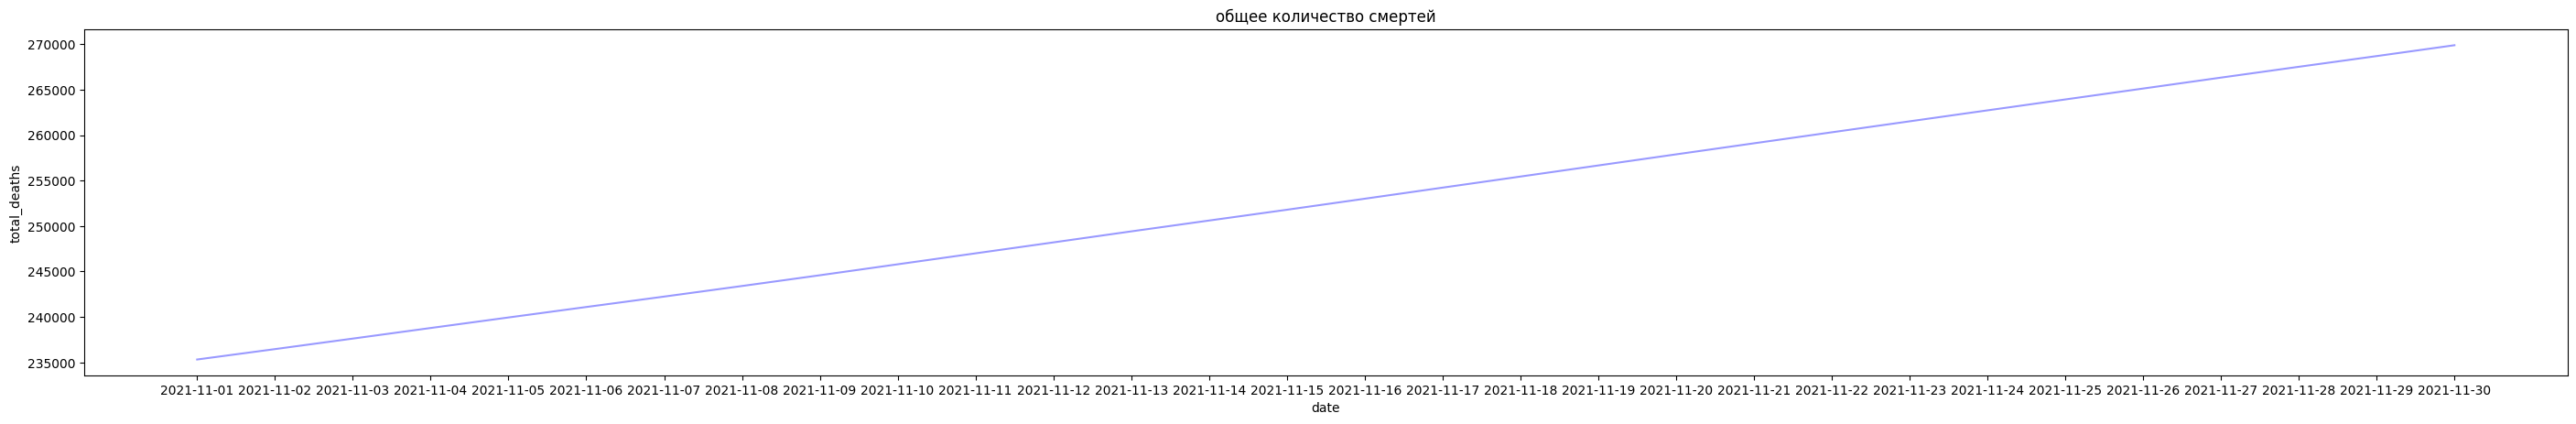

In [ ]:
# Посмотрим на то, как росло общее количество смертей каждый день; 
plt.figure(figsize=(35,5), dpi=100)
plt.plot(period.date, period.total_deaths, color='blue',alpha=0.4)
plt.title("общее количество смертей")
plt.xlabel("date")
plt.ylabel("total_deaths")

Проанализировав график, можно сказать, что с 1 ноября 2021 по 1 декабря 2021 общее количество смертей линейно увеличивалось на протяжении всего периода.

Text(0, 0.5, 'new_deaths')

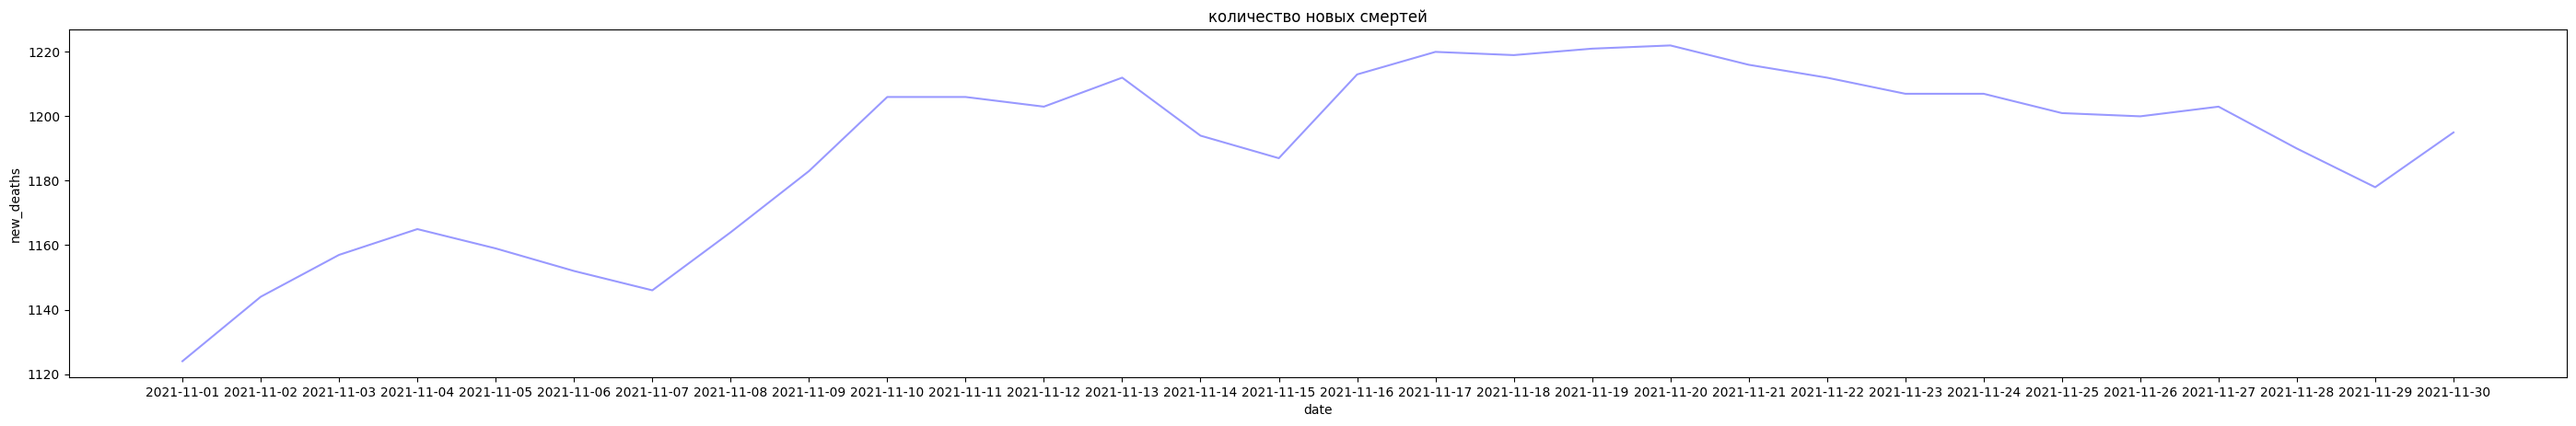

In [ ]:
# Посмотрим, как изменялось количество новых смертей каждый день; 
plt.figure(figsize=(35,5), dpi=100)
plt.plot(period.date,period.new_deaths, color='blue',alpha=0.4)
plt.title("количество новых смертей")
plt.xlabel("date")
plt.ylabel("new_deaths")

Проанализировав график, можно сказать, что с 1 ноября 2021 по 1 декабря 2021 количество новый смертей увеличилось за весь рассматриваемый период. 

Если рассматривать весь период, рассматриваемый график показывает плохую тенденцию. Но, если рассматривать отдельные даты, можно заметить, что в некоторые дни происходит значительное уменьшение количества смертей. 

Text(0, 0.5, 'total_cases')

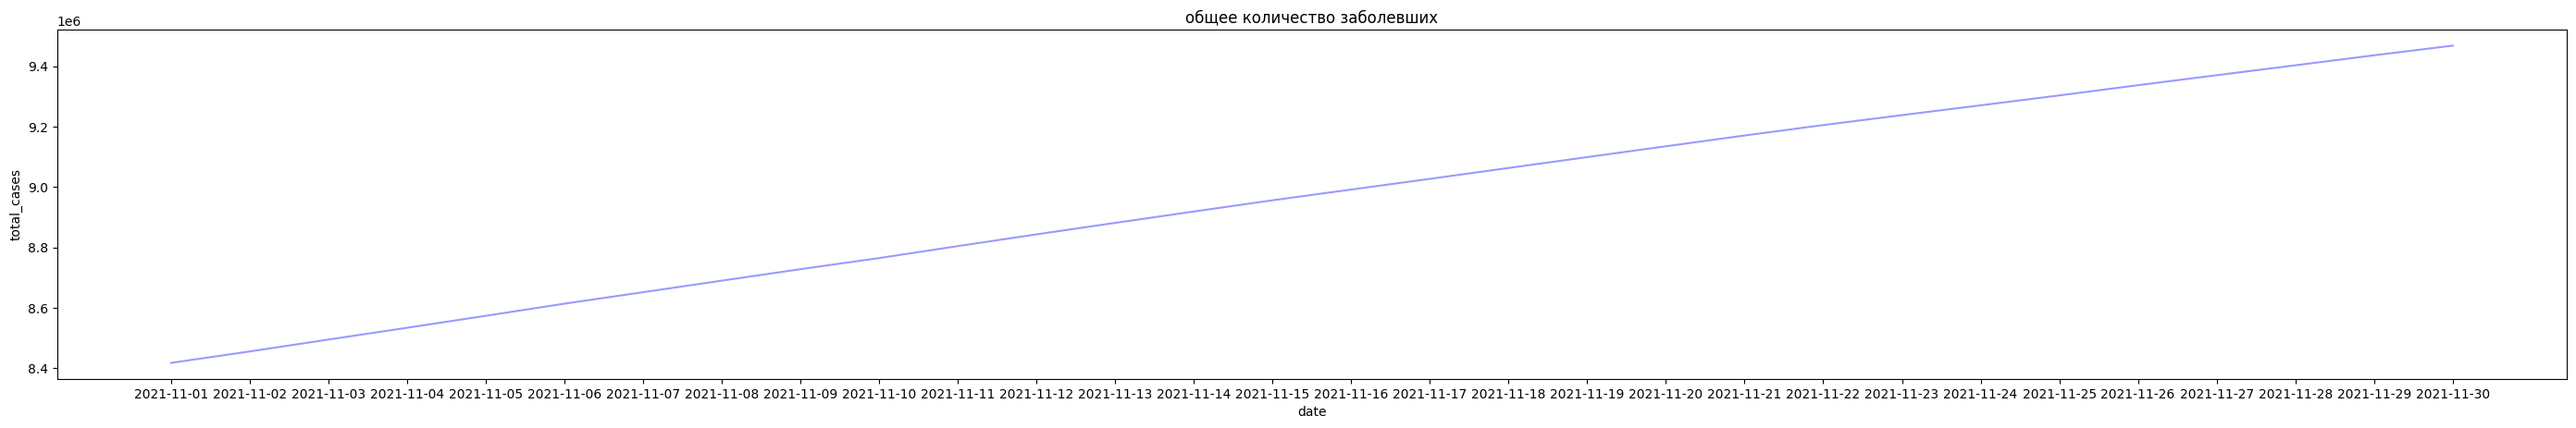

In [ ]:
# Посмотрим на то, как росло общее количество заболевших каждый день; 
plt.figure(figsize=(35,5), dpi=100)
plt.plot(period.date, period.total_cases, color='blue',alpha=0.4)
plt.title("общее количество заболевших")
plt.xlabel("date")
plt.ylabel("total_cases")

Проанализировав график, можно сказать, что с 1 ноября 2021 по 1 декабря 2021 общее количество заболевших линейно увеличивалось на протяжении всего периода.

Text(0, 0.5, 'new_cases')

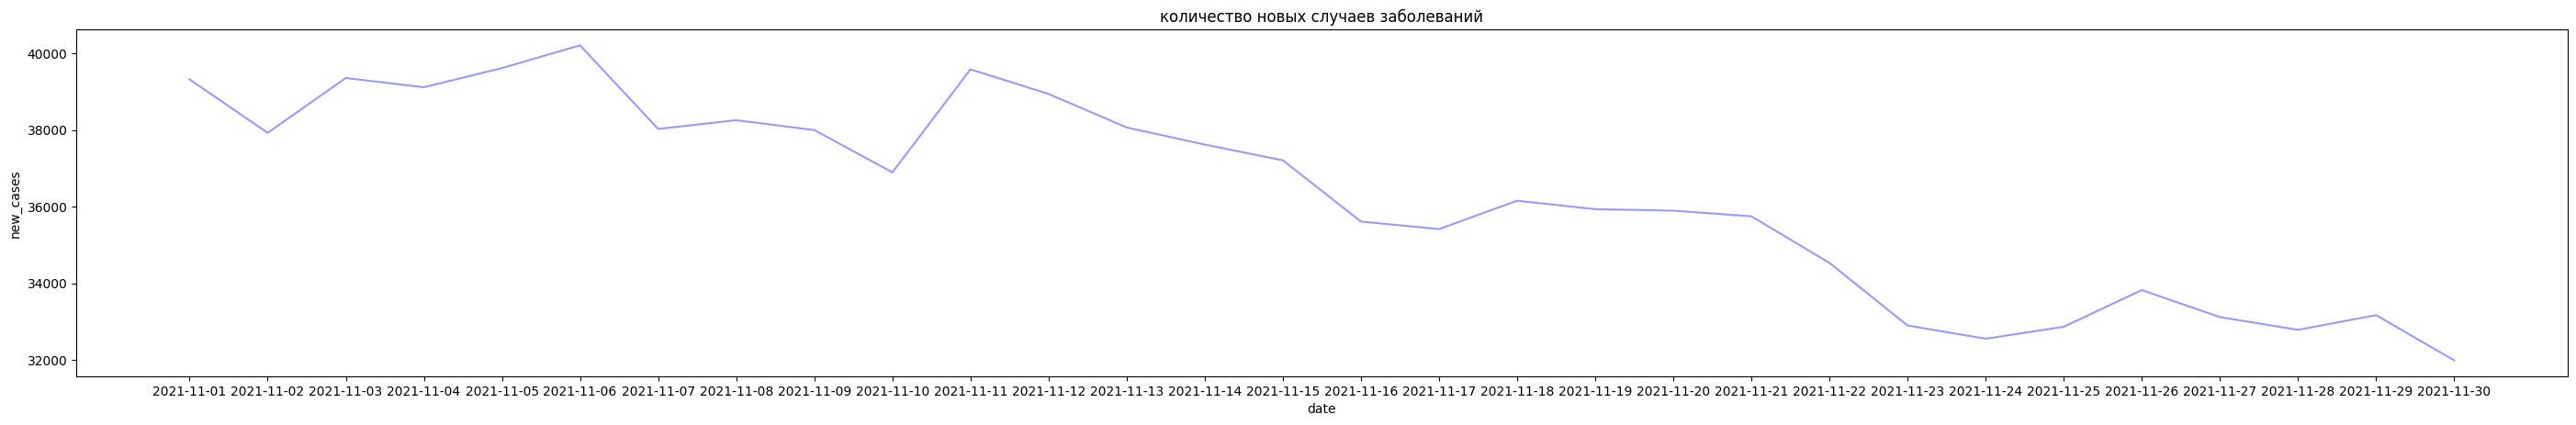

In [ ]:
# Посмотрим,как изменялось количество новых случаев заболеваний каждый день; 
plt.figure(figsize=(35,5), dpi=100)
plt.plot(period.date, period.new_cases, color='blue',alpha=0.4)
plt.title("количество новых случаев заболеваний")
plt.xlabel("date")
plt.ylabel("new_cases")

Проанализировав график, можно сказать, что с 1 ноября 2021 по 1 декабря 2021 количество новый случаев заболеваний уменьшилось за весь рассматриваемый период.

Если рассматривать весь период, рассматриваемый график показывает отличную тенденцию. Но, если рассматривать отдельные даты, можно заметить, что в некоторые дни происходит увеличение количества случаев новых заболеваний.

## Предобработка данных

### Фильтрация данных

Для того, чтобы нам в дальнейшем было удобнее работать, мы из общей таблицы выберем только те столбцы, которые понабодятся для анализа.

In [ ]:
filtr = period[['iso_code','continent','location','date','new_cases','total_cases','total_deaths', 'new_deaths']]
filtr.head(5)

,iso_code,continent,location,date,new_cases,total_cases,total_deaths,new_deaths
102308,RUS,Europe,Russia,2021-11-01,39321.0,8417305.0,235318.0,1124.0
102309,RUS,Europe,Russia,2021-11-02,37927.0,8455232.0,236462.0,1144.0
102310,RUS,Europe,Russia,2021-11-03,39357.0,8494589.0,237619.0,1157.0
102311,RUS,Europe,Russia,2021-11-04,39117.0,8533706.0,238784.0,1165.0
102312,RUS,Europe,Russia,2021-11-05,39617.0,8573323.0,239943.0,1159.0


### Обработка пропусков

Мы работаем в задаче с временным промежутком, и нам важно, чтобы не было отсутствующих дат:

In [ ]:
filtr['date']

102308    2021-11-01
102309    2021-11-02
102310    2021-11-03
102311    2021-11-04
102312    2021-11-05
102313    2021-11-06
102314    2021-11-07
102315    2021-11-08
102316    2021-11-09
102317    2021-11-10
102318    2021-11-11
102319    2021-11-12
102320    2021-11-13
102321    2021-11-14
102322    2021-11-15
102323    2021-11-16
102324    2021-11-17
102325    2021-11-18
102326    2021-11-19
102327    2021-11-20
102328    2021-11-21
102329    2021-11-22
102330    2021-11-23
102331    2021-11-24
102332    2021-11-25
102333    2021-11-26
102334    2021-11-27
102335    2021-11-28
102336    2021-11-29
102337    2021-11-30
Name: date, dtype: object

В выбранном нами временном промежутке пропусков нет. Можем продолжать работать с данным периодом. 

### Вывод по этапу.


В данном разделе мы познакомились с данными. 

Выбрали страну, период, с которыми в дальнейшем будем работать. 

Построили графики и проанализировали, как изменилялись за определенный период следующие показатели:

*   total_cases - количество заболевших за весь период на определенную дату;
*   new_cases - количество новых случаев заболеваний;
*   total_deaths - количество смертей за весь период на определенную дату;
*   new_deaths - количество смертей за определенный день;

Проверили на пропуски наш временной период. И удобства выбрали только те столбцы, которые понадобятся для анализа.

## EDA или разведочный анализ данных.

В данном блоке наша задача - познакомиться "поближе" с данными, которыми мы располагаем.

Для начала посмотрим на статистику по выбранным нами раннее столбцам:

In [ ]:
filtr.describe()

,new_cases,total_cases,total_deaths,new_deaths
count,30.000000,3.000000e+01,30.000000,30.000000
mean,36355.200000,8.961616e+06,252491.333333,1190.200000
std,2546.949743,3.205678e+05,10553.549984,26.905198
min,31990.000000,8.417305e+06,235318.000000,1124.000000
25%,34001.250000,8.699318e+06,243700.750000,1168.250000
50%,36525.500000,8.973942e+06,252402.500000,1200.500000
75%,38209.750000,9.230105e+06,261224.250000,1210.750000
max,40210.000000,9.468640e+06,269900.000000,1222.000000


Посмотрим столбец с датами и индексами:

In [ ]:
filtr['date']

102308    2021-11-01
102309    2021-11-02
102310    2021-11-03
102311    2021-11-04
102312    2021-11-05
102313    2021-11-06
102314    2021-11-07
102315    2021-11-08
102316    2021-11-09
102317    2021-11-10
102318    2021-11-11
102319    2021-11-12
102320    2021-11-13
102321    2021-11-14
102322    2021-11-15
102323    2021-11-16
102324    2021-11-17
102325    2021-11-18
102326    2021-11-19
102327    2021-11-20
102328    2021-11-21
102329    2021-11-22
102330    2021-11-23
102331    2021-11-24
102332    2021-11-25
102333    2021-11-26
102334    2021-11-27
102335    2021-11-28
102336    2021-11-29
102337    2021-11-30
Name: date, dtype: object

Построим графическое представление всех столбцов:

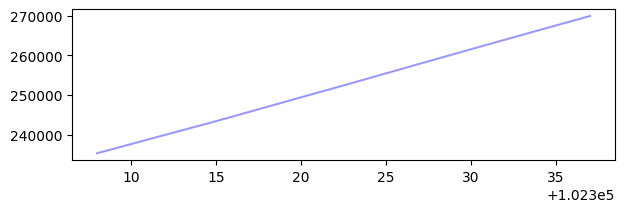

In [ ]:
# Посмотрим на то, как росло общее количество смертей каждый день; 
plt.figure(figsize=(7,2), dpi=100)
plt.plot(period.total_deaths, color='blue',alpha=0.4)

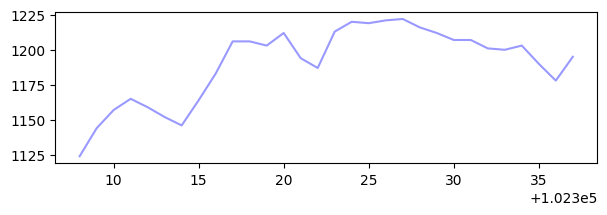

In [ ]:
# Посмотрим, как изменялось количество новых смертей каждый день; 
plt.figure(figsize=(7,2), dpi=100)
plt.plot(period.new_deaths, color='blue',alpha=0.4)

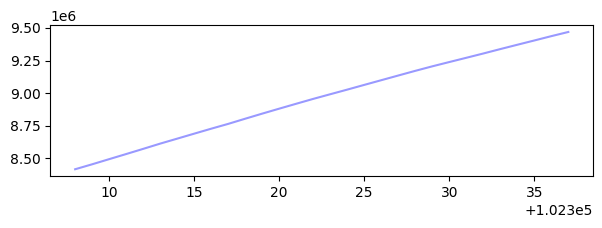

In [ ]:
# Посмотрим на то, как росло общее количество заболевших каждый день; 
plt.figure(figsize=(7,2), dpi=100)
plt.plot( period.total_cases, color='blue',alpha=0.4)

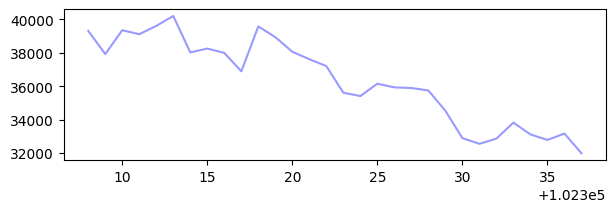

In [ ]:
# Посмотрим,как изменялось количество новых случаев заболеваний каждый день; 
plt.figure(figsize=(7,2), dpi=100)
plt.plot(period.new_cases, color='blue',alpha=0.4)

Рассмотрим первый и второй график.

Посмотрим на то, как линейно росло общее количество смертей и как изменялось количество новых смертей каждый день. 

Мне кажется, что для того, чтобы определить будет ли смертность увеличиваться или уменьшаться в России необходимо рассматривать либо период, который затрагивает временной промежуток побольше, либо все страны в совокупности (особенно рассматривать "соседние" страны).

Рассмотрим третий и четвертый график.

Посмотрим на то, как линейно росло общее количество заболевших и как изменялось количество новых случаев заболеваний каждый день. 

В связи с массовой вакцинацией страны можно заметить скачкообразный спад количества новых случаев заболеваний. Предполаю, что данная тенденция будет только улучшаться и мы можем по данному графику сделать определенный вывод, что не скажешь об общем количестве заболевших, которое растет линейно на протяжении всего периода. По рассматриваемому графику сложно дать ответ, что будет, если мы захотим понять, что произойдет в будущем с общим количеством заболевших в России.

## Построение моделей, анализ результатов.

### Разделим датасет на тренировочную и тестовую (валидационную) выборки, проверим на статичность

In [ ]:
filtr.columns

Index(['iso_code', 'continent', 'location', 'date', 'new_cases', 'total_cases',
       'total_deaths', 'new_deaths'],
      dtype='object')

In [ ]:
X, y = filtr[[ 'new_cases', 'total_cases','total_deaths', 'new_deaths']], filtr['date']

In [ ]:
X.head()

,new_cases,total_cases,total_deaths,new_deaths
102308,39321.0,8417305.0,235318.0,1124.0
102309,37927.0,8455232.0,236462.0,1144.0
102310,39357.0,8494589.0,237619.0,1157.0
102311,39117.0,8533706.0,238784.0,1165.0
102312,39617.0,8573323.0,239943.0,1159.0


In [ ]:
y.head()

102308    2021-11-01
102309    2021-11-02
102310    2021-11-03
102311    2021-11-04
102312    2021-11-05
Name: date, dtype: object

In [ ]:
# Функции для разделения данных на данные для обучения и тестирования
from sklearn.model_selection import train_test_split

In [ ]:
# Разделим данные на данные для обучения и тестирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.head()

,new_cases,total_cases,total_deaths,new_deaths
102327,35896.0,9135149.0,257891.0,1222.0
102322,37210.0,8956136.0,251796.0,1187.0
102328,35749.0,9170898.0,259107.0,1216.0
102337,31990.0,9468640.0,269900.0,1195.0
102316,37999.0,8727817.0,244588.0,1183.0


In [ ]:
X_test.head()

,new_cases,total_cases,total_deaths,new_deaths
102326,35935.0,9099253.0,256669.0,1221.0
102315,38257.0,8689818.0,243405.0,1164.0
102323,35612.0,8991748.0,253009.0,1213.0
102333,33824.0,9337575.0,265134.0,1200.0
102336,33170.0,9436650.0,268705.0,1178.0


In [ ]:
y_train.head()

102327    2021-11-20
102322    2021-11-15
102328    2021-11-21
102337    2021-11-30
102316    2021-11-09
Name: date, dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
X_train 
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Оцениваем качетво
from sklearn.metrics import accuracy_score

In [ ]:
# Оцениваем качество на выборке обучения
accuracy_score(y_train, model.predict(X_train))

1.0

In [ ]:
# Оцениваем качество на выборке тестирования
accuracy_score(y_train, model.predict(X_train))

1.0

In [ ]:
# Модель DecisionTreeClassifier обучим на тех же данных и посмотрим качество

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_tree = DecisionTreeClassifier()

In [ ]:
model_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
accuracy_score(y_test, model_tree.predict(X_test))

0.0

### Построим графики автокорреляции и частичной автокорреляции, разобьем на сезонность и тренд.

In [ ]:
import numpy as np

# импорт SARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # для определения (p,q) 
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков

# метрики
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
filtr['mean50'] = filtr['new_cases'].rolling(window=50).mean()
filtr['mean5'] = filtr['new_cases'].rolling(window=5).mean()

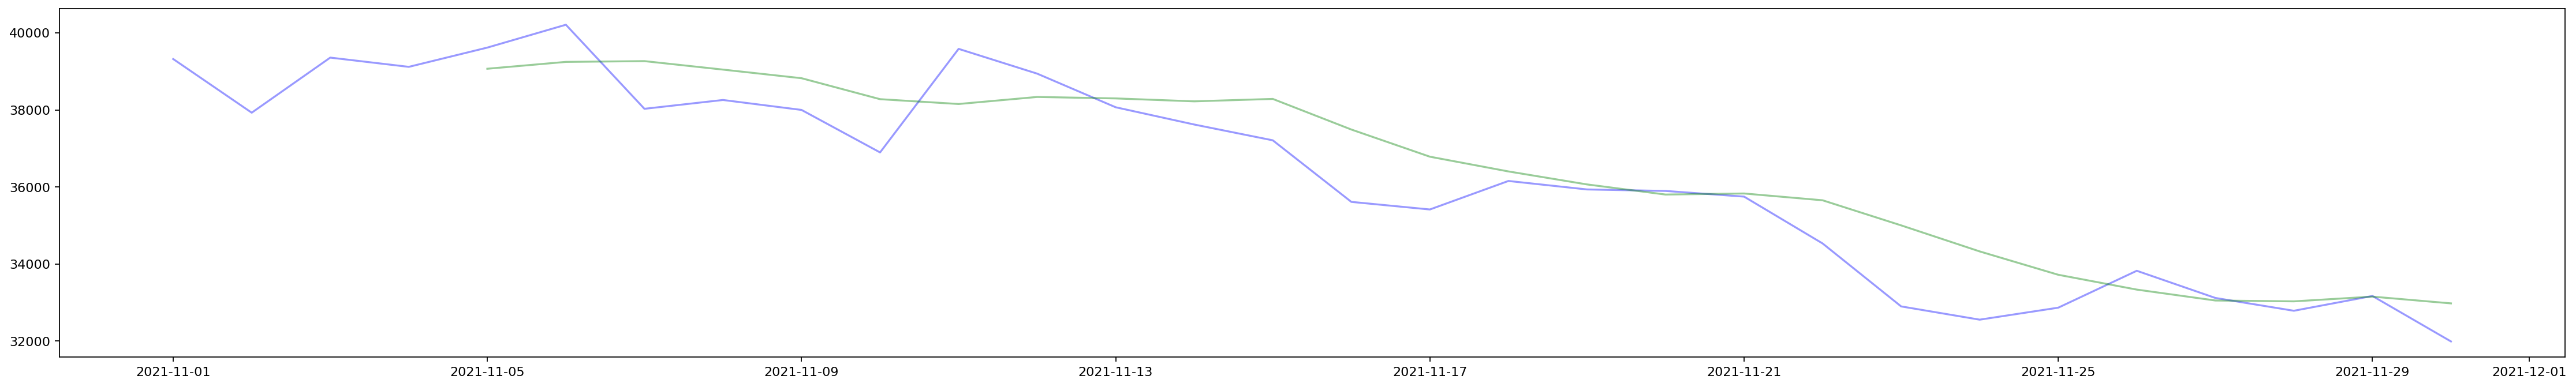

In [ ]:
plt.figure(figsize=(35,5), dpi=160)
plt.plot(filtr.new_cases, color='blue',alpha=0.4)
plt.plot(filtr.mean50, color='red',alpha=0.4)
plt.plot(filtr.mean5, color='green',alpha=0.4)
plt.show()


In [ ]:
filtr.corr()

,new_cases,total_cases,total_deaths,new_deaths,mean50,mean5
new_cases,1.000000,-0.923081,-0.929946,-0.519107,NaN,0.934030
total_cases,-0.923081,1.000000,0.999273,0.678392,NaN,-0.971358
total_deaths,-0.929946,0.999273,1.000000,0.655028,NaN,-0.977071
new_deaths,-0.519107,0.678392,0.655028,1.000000,NaN,-0.369354
mean50,NaN,NaN,NaN,NaN,NaN,NaN
mean5,0.934030,-0.971358,-0.977071,-0.369354,NaN,1.000000


In [ ]:
r = seasonal_decompose(filtr['new_cases'])

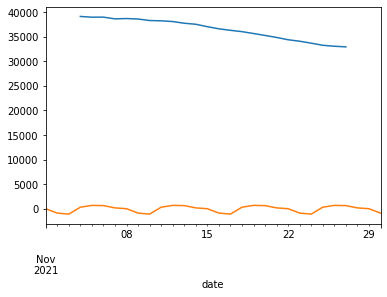

In [ ]:
r.trend.plot()
r.seasonal.plot()

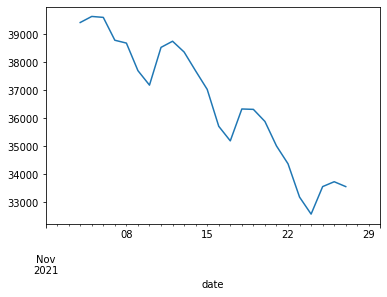

In [ ]:
(r.trend + r.seasonal).plot()

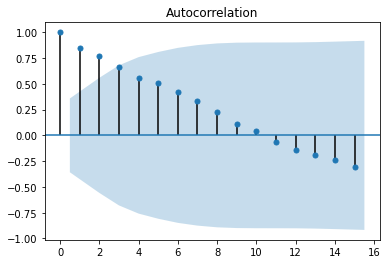

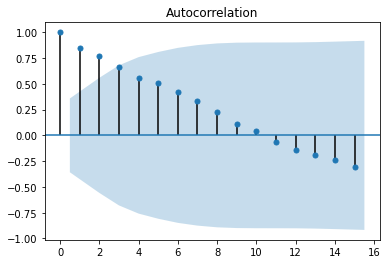

In [ ]:
plot_acf(filtr['new_cases'])

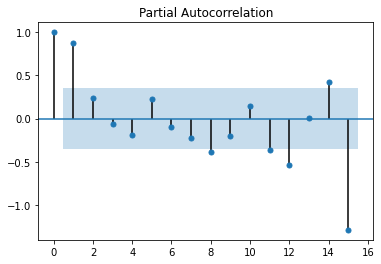

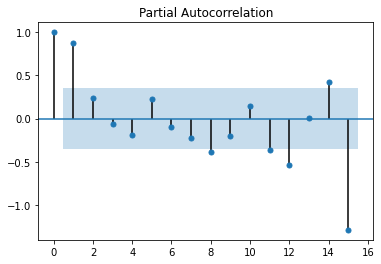

In [ ]:
plot_pacf(filtr['new_cases'])

### Примененим 1 способа прогнозирования.

In [ ]:
df5 = pd.read_csv('owid-covid-data.csv', encoding='windows-1251', index_col='date',parse_dates=True) 
Russia1 = df5[df5['location'] == 'Russia']
period1 = Russia1.query("'2021-10-01' <= date < '2021-12-01'")
df6 = period1[['new_cases']]
#df6.index.freq = 'MS'

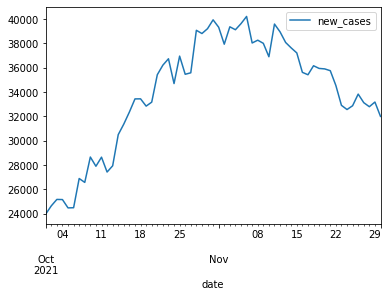

In [ ]:
df6.plot()

In [ ]:
train = df6.iloc[:len(df6)-12]
test = df6.iloc[len(df6)-12:]

Используем первый метод прогнозирования.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

Инициализируем и обучаем модель.

In [ ]:
model1 = SARIMAX(df6['new_cases'], order=(1, 1, 2), seasonal_order=(1, 0, 1, 12))
results = model1.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Построем предсказания.

In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename(' Predictions SARIMAX(1, 1, 2)x(1, 0, [1], 12)')

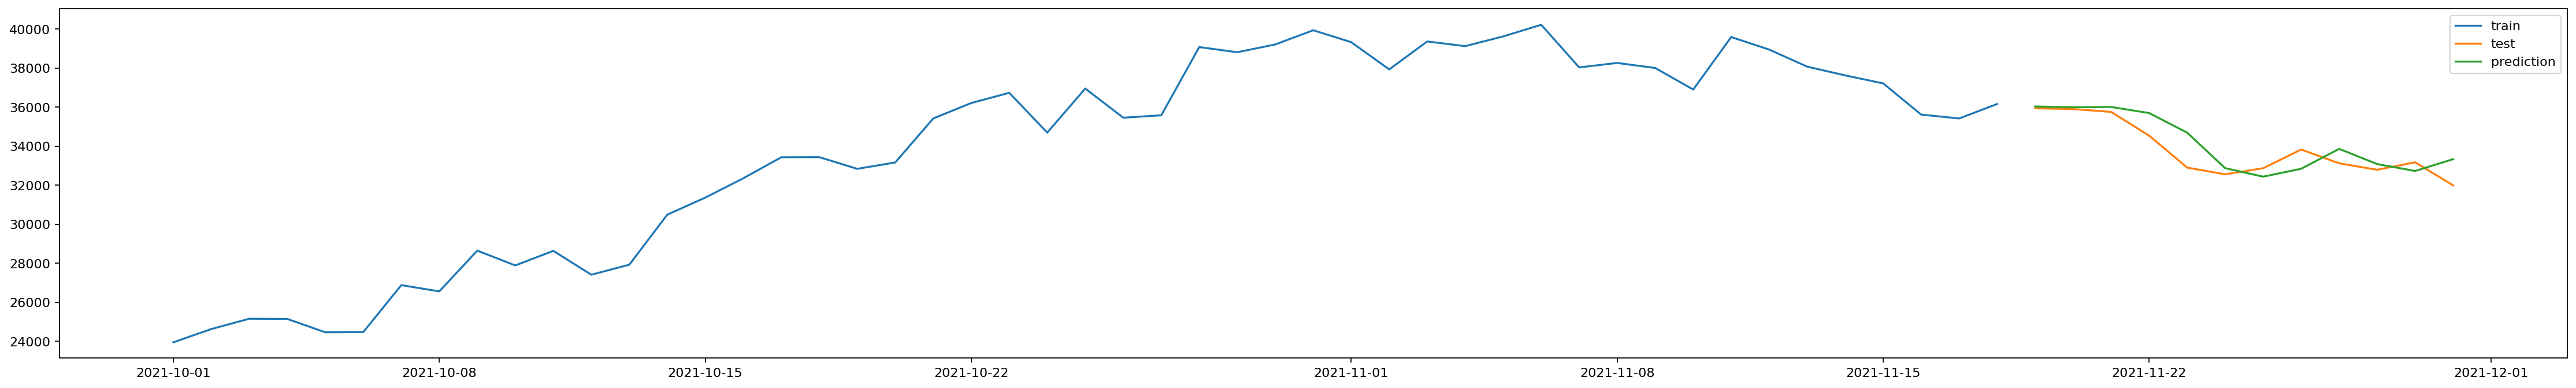

In [ ]:
plt.figure(figsize=(35,5), dpi=160)
plt.plot(train, label='train')
plt.plot(test, label='test')
plt.plot(predictions, label='prediction')
plt.legend()
plt.show()

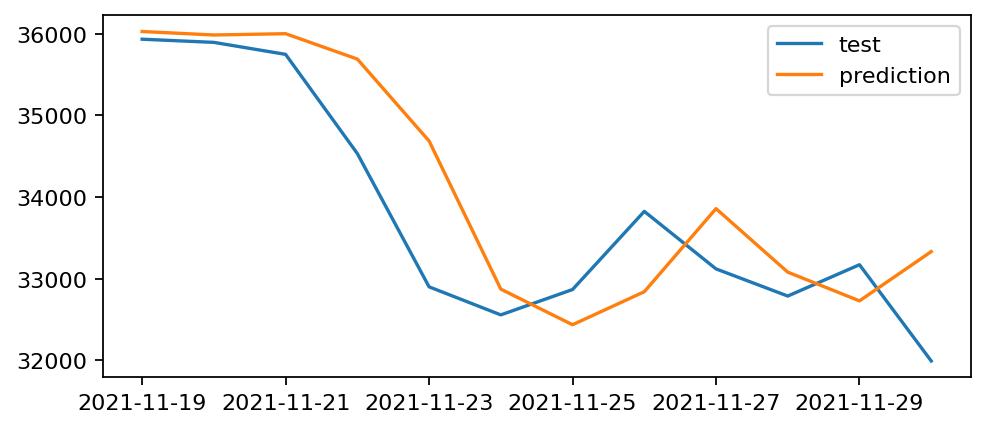

In [ ]:
plt.figure(figsize=(7,3), dpi=160)
plt.plot(test, label='test')
plt.plot(predictions, label='prediction')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [ ]:
print('Рассчет точности полученного прогноза.')
print('MAE:', mean_absolute_error(test, predictions))
print('MAPE:', mean_absolute_percentage_error(test, predictions))
print('MSE:', mean_squared_error(test, predictions))

Рассчет точности полученного прогноза.
MAE: 661.0823844312278
MAPE: 0.0198836730551333
MSE: 708546.0195614834


### Применим 2 способ прогнозирования

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
model_hw = ExponentialSmoothing(df6,trend='add',seasonal='add',seasonal_periods=12).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [ ]:
predictions_hw = model_hw.predict(start=start, end=end)

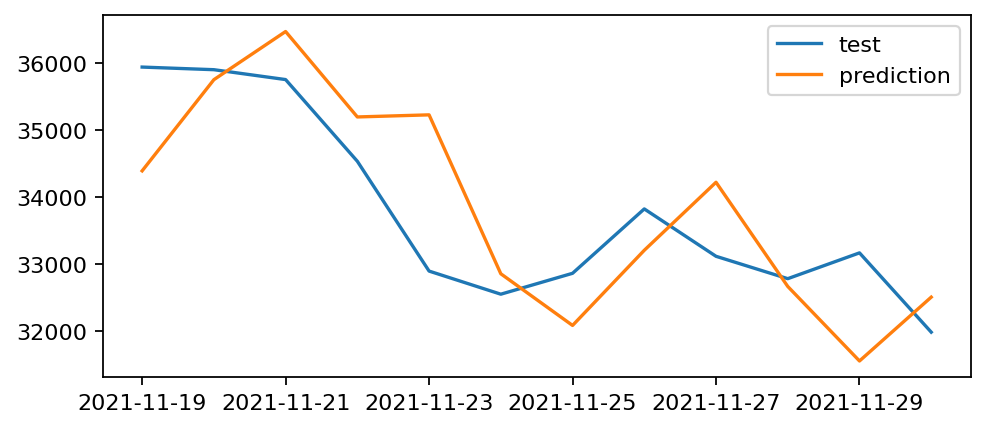

In [ ]:
plt.figure(figsize=(7,3), dpi=160)
plt.plot(test, label='test')
plt.plot(predictions_hw, label='prediction')
plt.legend()
plt.show()

In [ ]:
print('Рассчет точности полученного прогноза.')
print('MAE:', mean_absolute_error(test, predictions_hw))
print('MAPE:', mean_absolute_percentage_error(test, predictions_hw))
print('MSE:', mean_squared_error(test, predictions_hw))

Рассчет точности полученного прогноза.
MAE: 869.6671281196064
MAPE: 0.02580314465957553
MSE: 1160032.8080152974


## Выводы

Алгоритм действий, который мы будем использовать при прогнозировании:

*   Создаем модель
*   Обучаем модель
*   Создаем прогноз
*   Сравниваем прогноз и предсказание
*   Рассчитываем качество полученной модели и прогноза

Для того, чтобы понять подходит ли модель. Мы используем 
следующие методы рассчета ошибки:

MAPE - средняя абсолютная ошибка в процентах.

RMSE - квадратный корень из среднеквадратичной ошибки.

MSE - среднеквадратичный корень (связан с RMSE).

1 способ прогнозирования показал следующие результаты:

*   MAE: 661.0823844312278
*   MAPE: 0.0198836730551333
*   MSE: 708546.0195614834

2 способ прогнозирования показал следующие результаты:

*   MAE: 869.6671281196064
*   MAPE: 0.02580314465957553
*   MSE: 1160032.8080152974

Сравнив полученные метрики с ошибками понимаем, что первая модель точнее всего создает прогноз.

Прогноз, который мы получили не самый точный. С учетом того, насколько сложен процесс распространения коронавирусной инфекции, можно с уверенностью сказать, что обычный анализ временного ряда вряд ли даст очень хороший результат. Иначе бы у ученых-прогнозистов не было проблем с предзказанием коронавирусной инфекии 




Презентация:
https://docs.google.com/presentation/d/1RHK8OWkg_GUEqcIloo9pJ8QA4GGHGyEg/edit?usp=sharing&ouid=103779134406038086064&rtpof=true&sd=true